In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score

# IMPORTING DATASET

In [11]:
data = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')

In [12]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


# Data Cleaning

## Detecting and handling Null values

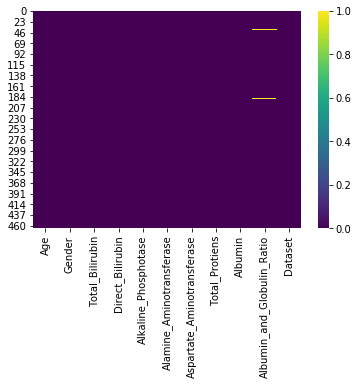

In [13]:
sns.heatmap(data.isnull(), cmap='viridis')

In [14]:
data.dropna(inplace=True, axis=0)

In [15]:
datatest.dropna(inplace=True, axis=0)

## Handling categorical values

In [16]:
data['Male'] = pd.get_dummies(data.Gender, prefix='Gender', drop_first=True)
datatest['Male'] = pd.get_dummies(datatest.Gender, prefix='Gender', drop_first=True)

#data['Female'] = pd.get_dummies(data.Gender, prefix='Gender', drop_first=True)
#datatest['Female'] = pd.get_dummies(datatest.Gender, prefix='Gender', drop_first=True)

In [17]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Male
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1,0
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0


# Data Visualisation

In [20]:
finaldata = data.drop(columns=['Gender'])
finaltestdata = datatest.drop(columns=['Gender'])

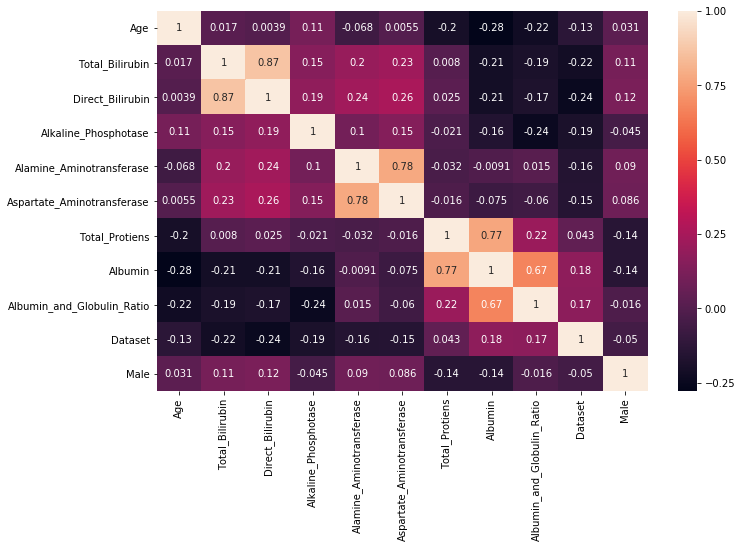

In [21]:
plt.figure(figsize=(11,7))
sns.heatmap(finaldata.corr(), annot=True)

# Train Test Split

In [22]:
X = finaldata.drop(columns=['Direct_Bilirubin','Alkaline_Phosphotase', 'Dataset'])
# X = finaldata.drop(columns=['Age', 'Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Dataset'])
y = finaldata['Dataset']

In [23]:
Xreal = finaltestdata.drop(columns=['Direct_Bilirubin','Alkaline_Phosphotase'])
Xreal.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male
0,46,0.8,31,40,7.3,3.8,1.10,1
1,15,0.8,25,66,6.1,3.7,1.50,1
2,66,4.2,15,30,7.1,2.2,0.40,0
3,32,0.6,45,31,7.5,4.3,1.34,1
4,60,2.6,42,37,5.4,2.7,1.00,1


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male
0,60,6.3,118,114,6.6,3.7,1.27,1
1,31,0.8,21,16,6.0,3.0,1.00,0
2,60,19.6,46,52,6.1,2.0,0.40,1
3,34,8.7,58,138,5.8,2.4,0.70,1
4,26,0.9,16,12,7.0,3.5,1.00,0


In [27]:
Xreal.head()

,Age,Total_Bilirubin,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male
0,46,0.8,31,40,7.3,3.8,1.10,1
1,15,0.8,25,66,6.1,3.7,1.50,1
2,66,4.2,15,30,7.1,2.2,0.40,0
3,32,0.6,45,31,7.5,4.3,1.34,1
4,60,2.6,42,37,5.4,2.7,1.00,1


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [32]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81       106
           2       0.33      0.27      0.30        33

    accuracy                           0.70       139
   macro avg       0.56      0.55      0.55       139
weighted avg       0.68      0.70      0.69       139

0.697841726618705


In [33]:
print(accuracy_score(y_test, pred))

0.697841726618705


## Decision Trees and Random Forests

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
classi = DecisionTreeClassifier()

In [36]:
classi.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
y_p = classi.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_p))

[[79 27]
 [20 13]]


In [39]:
print(classification_report(y_test, y_p))
print(accuracy_score(y_test, y_p))

              precision    recall  f1-score   support

           1       0.80      0.75      0.77       106
           2       0.33      0.39      0.36        33

    accuracy                           0.66       139
   macro avg       0.56      0.57      0.56       139
weighted avg       0.69      0.66      0.67       139

0.6618705035971223


In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
print(confusion_matrix(y_test,y_pred))

[[90 16]
 [23 10]]


In [43]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82       106
           2       0.38      0.30      0.34        33

    accuracy                           0.72       139
   macro avg       0.59      0.58      0.58       139
weighted avg       0.70      0.72      0.71       139

0.7194244604316546


## Using K-Nearest-Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
error_score = []

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_score.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

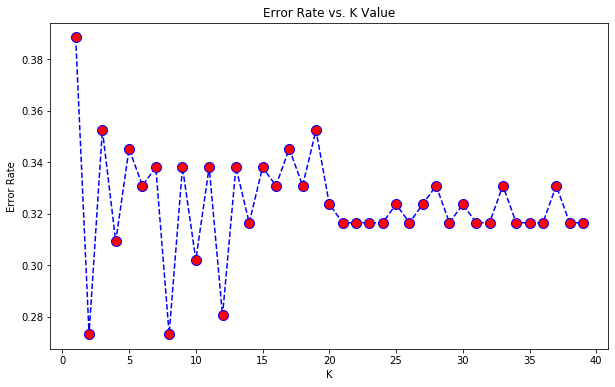

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred_k = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test, pred_k))
print(classification_report(y_test, pred_k))
print(accuracy_score(y_test, pred_k))

[[92 14]
 [24  9]]
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       106
           2       0.39      0.27      0.32        33

    accuracy                           0.73       139
   macro avg       0.59      0.57      0.58       139
weighted avg       0.70      0.73      0.71       139

0.7266187050359713


## Support vector machine

In [49]:
from sklearn.svm import SVC

In [50]:
classifier = SVC(gamma='auto')

In [51]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
pred = classifier.predict(X_test)
prediction = classifier.predict(Xreal)

In [53]:
print(confusion_matrix(y_test, pred))

[[106   0]
 [ 29   4]]


In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88       106
           2       1.00      0.12      0.22        33

    accuracy                           0.79       139
   macro avg       0.89      0.56      0.55       139
weighted avg       0.84      0.79      0.72       139



In [55]:
print(accuracy_score(y_test,pred))

0.7913669064748201


# Naive Byes

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.89      0.40      0.55       106
           2       0.30      0.85      0.45        33

    accuracy                           0.50       139
   macro avg       0.60      0.62      0.50       139
weighted avg       0.75      0.50      0.53       139



In [59]:
print(accuracy_score(y_test, y_pred))

0.5035971223021583


# Hence we can achieve maximum accuracy by training SVM Model

### Exporting Our Prediction CSV

In [60]:
Xreal.shape

(116, 8)

In [61]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Male'],
      dtype='object')

In [62]:
from sklearn.svm import SVC
out = SVC(gamma='auto')
out.fit(X_train, y_train)
prediction = classifier.predict(Xreal)

In [65]:
final = pd.read_csv('test.csv')
new_series = pd.Series(prediction)
Answer = pd.concat([final, new_series], axis=1)
Answer.rename(columns={0: 'Predictions'}, inplace=True)
export_csv = Answer.to_csv ('Output.csv', index = None, header=True)